### &lt;Header TBD&gt;

# OCO-3 Gridded Zarr Product SDAP Demo

## Libraries and Functions

The following libraries are needed to support accessing SDAP API. The functions called in this notebook are in the `sdap_modules` folder.

### Libraries

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

import sdap_modules.plotting as plotting
import sdap_modules.sdap_processing as processing

The base url, https://ideas-digitaltwin.jpl.nasa.gov/nexus, is the entry to access SDAP API.

In [2]:
BASE_URL = 'https://ideas-digitaltwin.jpl.nasa.gov'
NEXUS_URL = f'{BASE_URL}/nexus'

# Orbiting Carbon Observatory-3 (OCO-3) | Snapshot Area Maps (SAMs) | Zarr

NASA-JPL's OCO-3 is an instrument onboard the International Space Station that measures carbon dioxide in the Earth's atmosphere. OCO-3 is similar in design to its predecessor, OCO-2, with the addition of the Pointing Mirror Assembly (PMA) which essentially allows the instrument to focus its observations on the area surrounding a given location of interest on a single overflight. This is called a Snapshot Area Map, or SAM, and is the focus of this dataset. 

<div align="center">
    <figure>
        <img src="https://ocov3.jpl.nasa.gov/sams/plots/xco2/OCO3_Ops_B10305_r02_xco2_20200303_4719_fossil0005.png" width=500 />
        <figcaption>Example SAM over Los Angeles, CA, USA</figcaption>
    </figure>
</div>

This dataset was generated by taking [level 2 input files](https://disc.gsfc.nasa.gov/datasets/OCO3_L2_Lite_FP_10.4r/summary?keywords=oco3) and processing them into a level 3 SAM-only product on a fixed, global grid. The dataset was stored in the cloud-optimized Zarr format and then onboarded to the AQIC for access through the FireAlarm API.

## SAM Data Over Los Angeles, CA, USA

We start by visualizing a particular SAM over the following bounding box around Los Angeles.

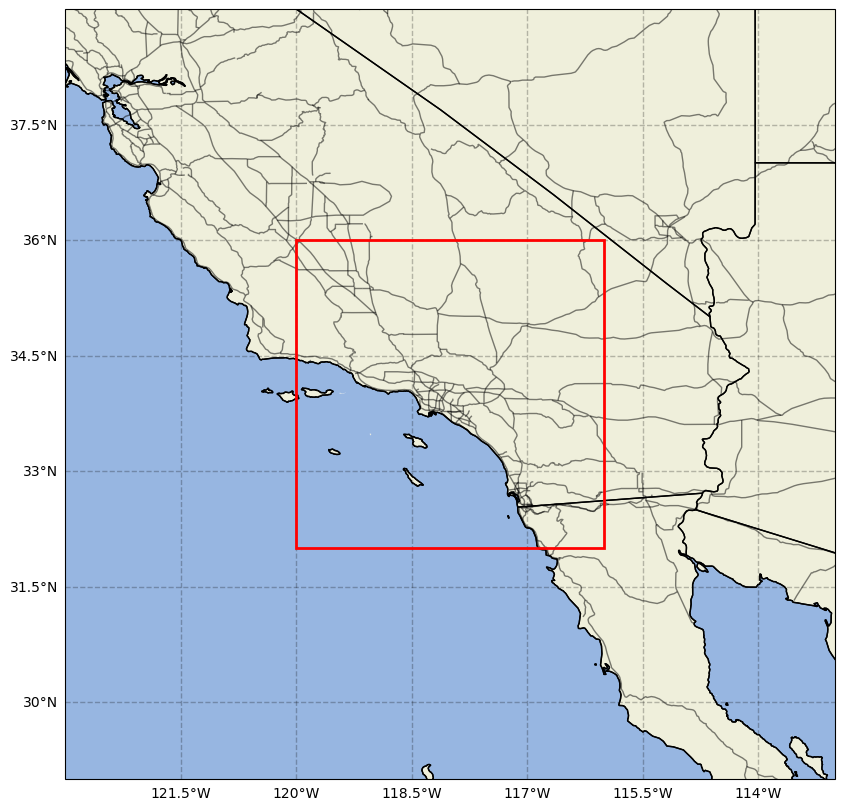

In [3]:
la_bb = {
    'min_lon': -120.0,
    'max_lon': -116.0,
    'min_lat': 32.0,
    'max_lat': 36.0
}

oco_start = datetime(2019, 9, 14)
oco_end = datetime(2023, 7, 1)

plotting.map_box(la_bb, padding=3)

In [4]:
la_sam_pre = processing.data_subsetting(NEXUS_URL, 'oco3_sams_l3_pre_qf', la_bb, datetime(2020, 8, 14), datetime(2020, 8, 15), 'xco2')
la_sam_post = processing.data_subsetting(NEXUS_URL, 'oco3_sams_l3_post_qf', la_bb, datetime(2020, 8, 14), datetime(2020, 8, 15), 'xco2')

https://ideas-digitaltwin.jpl.nasa.gov/nexus/datainbounds?ds=oco3_sams_l3_pre_qf&b=-120.0,32.0,-116.0,36.0&startTime=2020-08-14T00:00:00Z&endTime=2020-08-15T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 1.838113834000069 seconds
https://ideas-digitaltwin.jpl.nasa.gov/nexus/datainbounds?ds=oco3_sams_l3_post_qf&b=-120.0,32.0,-116.0,36.0&startTime=2020-08-14T00:00:00Z&endTime=2020-08-15T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 1.5832205839997187 seconds


There are two datasets produced from the OCO-3 data, denoted by "pre QF" and "post QF". Source OCO-3 data includes a flag to indicate whether particular observations are "good" or "bad". Using this, we can filter the data to contain only "good" data. This is "post QF" (post quality_flag filtering) data. 

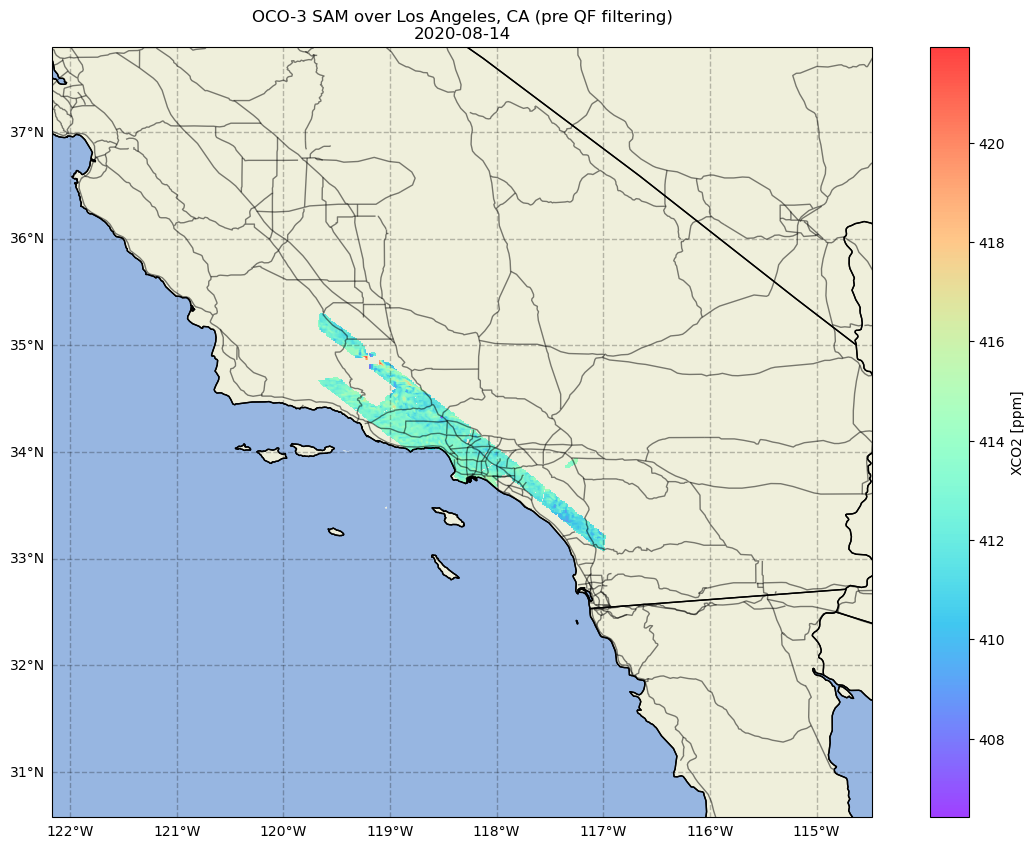

In [5]:
plotting.map_data(
    la_sam_pre[0], 
    f'OCO-3 SAM over Los Angeles, CA (pre QF filtering)\n{datetime(2020, 8, 14).strftime("%Y-%m-%d")}', 
    cb_label='XCO2 [ppm]'
)

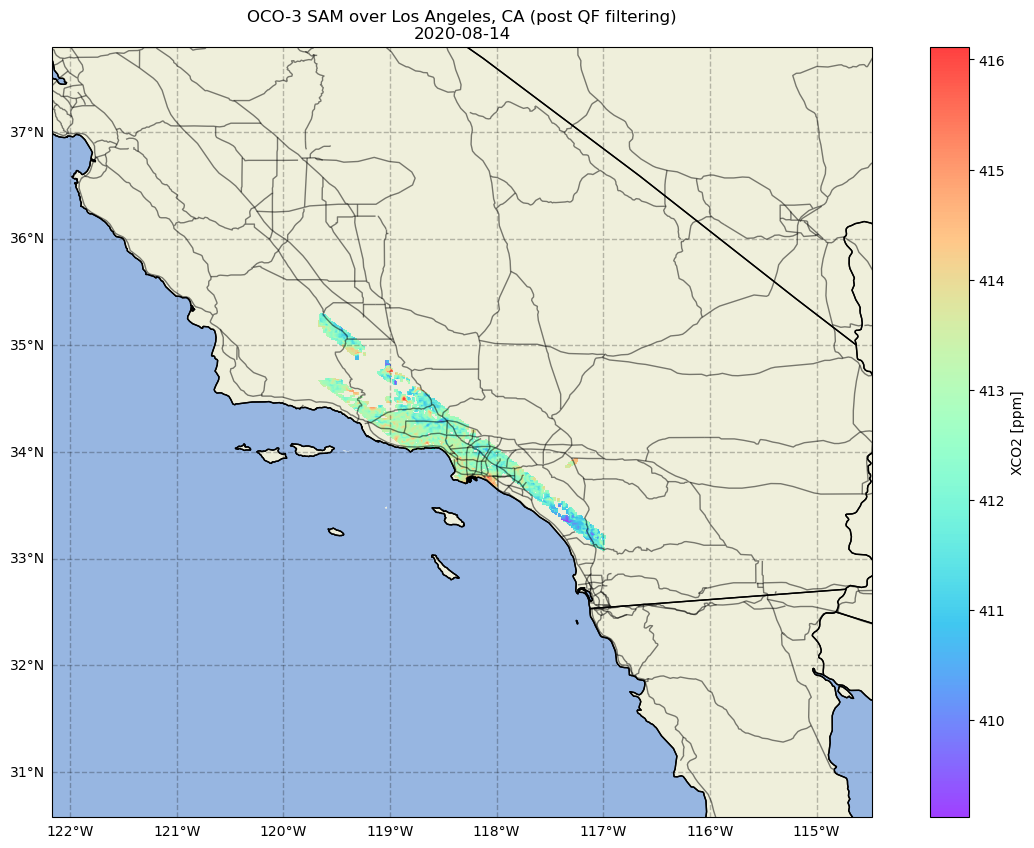

In [6]:
plotting.map_data(
    la_sam_post[0], 
    f'OCO-3 SAM over Los Angeles, CA (post QF filtering)\n{datetime(2020, 8, 14).strftime("%Y-%m-%d")}', 
    cb_label='XCO2 [ppm]'
)

## Use Case: CO2 Emissions During the Course of the COVID-19 Pandemic

The lockdowns in response to the COVID-19 pandemic led to many noticeable environmental changes. Among these was an observable dip in CO2 concentration which was restored to pre-COVID levels as restrictions eased.

In this section, we run time series on the OCO-3 SAM (post QF) dataset over the course of just over 2 years starting at the early stages of COVID lockdowns. We focus again on the LA area, as well as the city of Wuhan, China. 

In the time series, we can see an initial depression in XCO2 value lasting to around October 2020, from which there is a brief resurgence until another depression around mid-late 2021 corresponding to the emergence of the Delta variant of the SARS-CoV-2 virus. 

### Los Angeles

In [7]:
la_xco2_pre  = processing.spatial_timeseries(NEXUS_URL, 'oco3_sams_l3_pre_qf',  la_bb, oco_start, oco_end)
la_xco2_post = processing.spatial_timeseries(NEXUS_URL, 'oco3_sams_l3_post_qf', la_bb, oco_start, oco_end)

https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeSeriesSpark?ds=oco3_sams_l3_pre_qf&minLon=-120.0&minLat=32.0&maxLon=-116.0&maxLat=36.0&startTime=2019-09-14T00:00:00Z&endTime=2023-07-01T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 25.683579499999723 seconds
https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeSeriesSpark?ds=oco3_sams_l3_post_qf&minLon=-120.0&minLat=32.0&maxLon=-116.0&maxLat=36.0&startTime=2019-09-14T00:00:00Z&endTime=2023-07-01T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 15.008159750000232 seconds


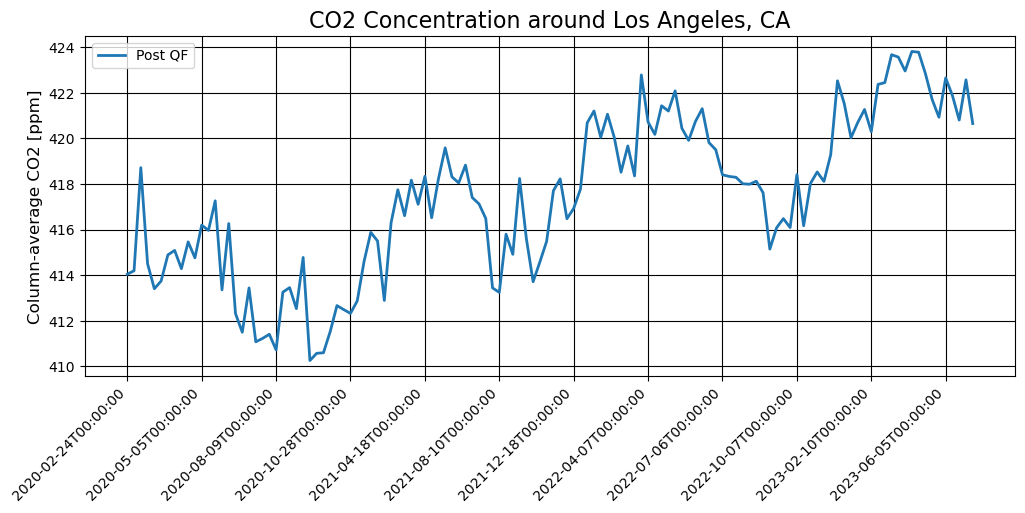

In [8]:
plotting.timeseries_plot_irregular(
    [
        # (la_xco2_pre['mean'], 'Pre QF'), 
        (la_xco2_post['mean'], 'Post QF'), 
    ], '', 'Column-average CO2 [ppm]', 'CO2 Concentration around Los Angeles, CA'
)

### Wuhan

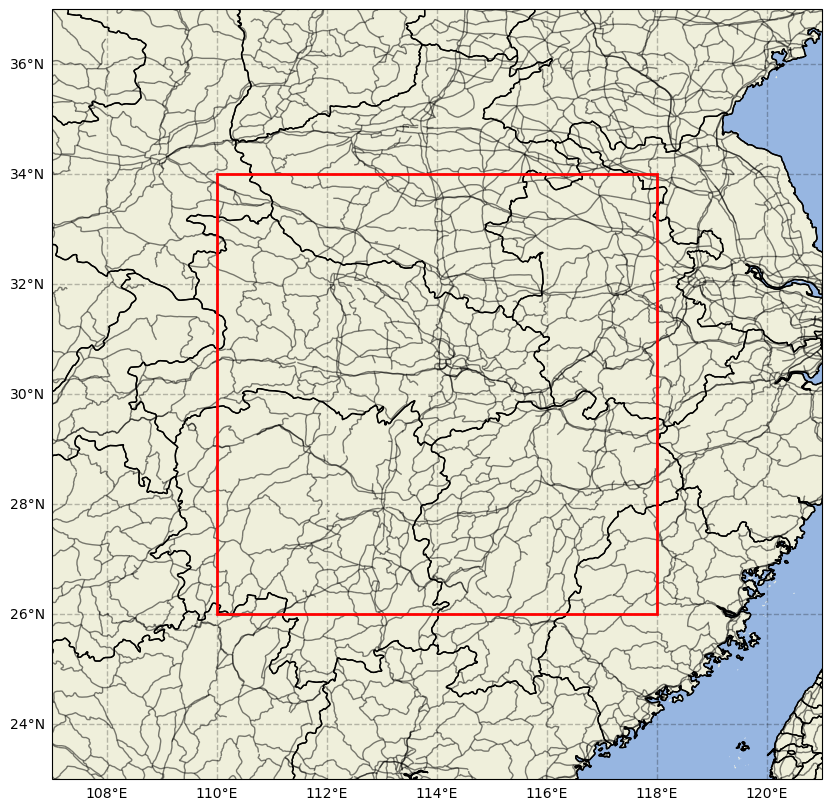

In [9]:
wuhan_bb = {
    'min_lon': 110,
    'max_lon': 118,
    'min_lat': 26,
    'max_lat': 34
}

oco_start = datetime(2018, 9, 14)
oco_end = datetime(2023, 7, 1)

plotting.map_box(wuhan_bb, padding=3)

In [10]:
wuhan_xco2_pre  = processing.spatial_timeseries(NEXUS_URL, 'oco3_sams_l3_pre_qf',  wuhan_bb, oco_start, oco_end)
wuhan_xco2_post = processing.spatial_timeseries(NEXUS_URL, 'oco3_sams_l3_post_qf', wuhan_bb, oco_start, oco_end)

https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeSeriesSpark?ds=oco3_sams_l3_pre_qf&minLon=110&minLat=26&maxLon=118&maxLat=34&startTime=2018-09-14T00:00:00Z&endTime=2023-07-01T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 22.52352641700054 seconds
https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeSeriesSpark?ds=oco3_sams_l3_post_qf&minLon=110&minLat=26&maxLon=118&maxLat=34&startTime=2018-09-14T00:00:00Z&endTime=2023-07-01T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 18.853070499999376 seconds


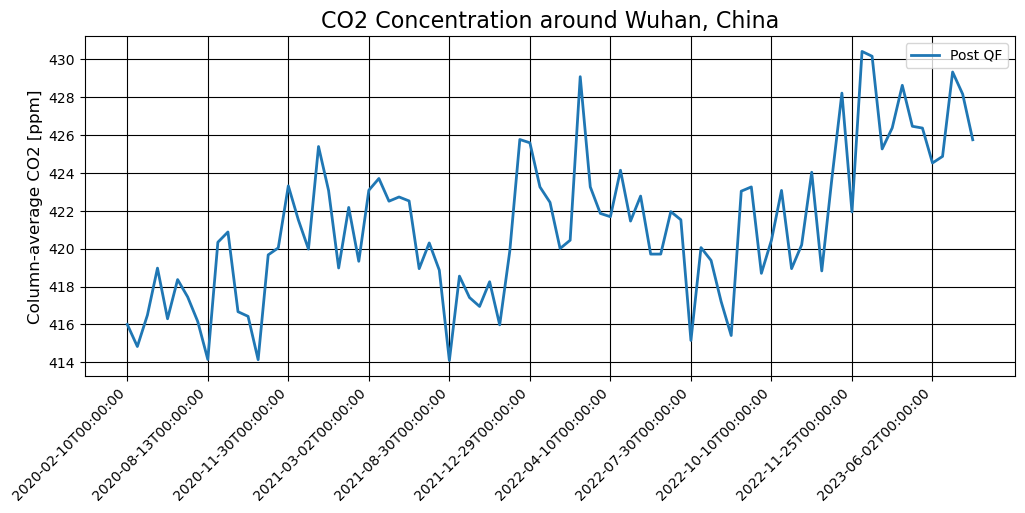

In [11]:
plotting.timeseries_plot_irregular(
    [
        # (wuhan_xco2_pre['maximum'], 'Pre QF'), 
        (wuhan_xco2_post['maximum'], 'Post QF'), 
    ], '', 'Column-average CO2 [ppm]', 'CO2 Concentration around Wuhan, China'
)

## Use Case: Monitoring CO2 Emissions from Europe's Largest Fossil Fueled Power Plant

A paper published on October 28 2022, in *Frontiers in Remote Sensing* by Nassar et al [1], made use of data from OCO-2 and OCO-3 (notably OCO-3 SAMs) to quantify emissions from Bełchatów Power Station in Poland, Europe's largest fossil fuel power plant. This section attempts to use the OCO-3 SAM dataset through the FireAlarm API to replicate some of the analyses produced in this study.

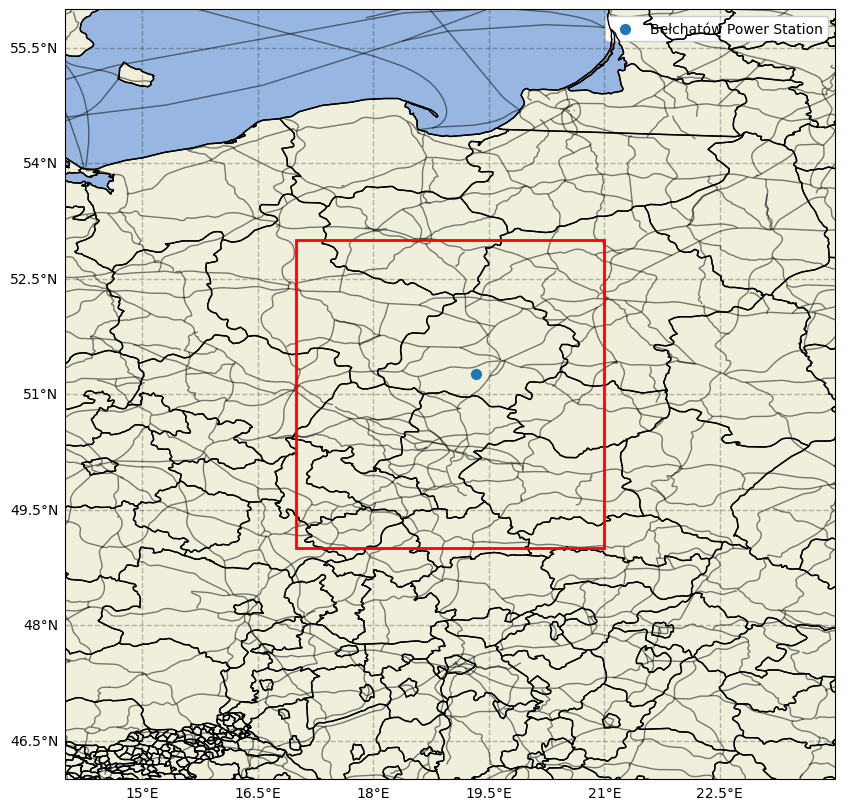

In [12]:
poland_ppt_bb = {
    'min_lon': 17,
    'max_lon': 21,
    'min_lat': 49,
    'max_lat': 53
}

oco_start = datetime(2020, 4, 10)
oco_end = datetime(2022, 6, 27)

plotting.map_box(poland_ppt_bb, [(51.266, 19.331, 'Bełchatów Power Station')], padding=3)

### CO2 Plumes

We first attempt to show the plumes of CO2 emissions from the power plant captured in OCO-3 SAMs on April 10th, 2020, and June 18th, 2021.

<div align="center">
    <figure>
        <img src="https://raw.githubusercontent.com/RKuttruff/FireAlarm-notebooks/3ea132d84a03e4c2f576a7f10f2764175e72d538/images/Be%C5%82chat%C3%B3w_SAMs.png" width=500 />
        <figcaption>Original SAMs on the dates in question, taken from the paper.</figcaption>
    </figure>
</div>


In [13]:
ppt_sams = [
    processing.data_subsetting(NEXUS_URL, 'oco3_sams_l3_post_qf', poland_ppt_bb, datetime(2020, 4, 10), datetime(2020, 4, 10), 'xco2'),
    processing.data_subsetting(NEXUS_URL, 'oco3_sams_l3_post_qf', poland_ppt_bb, datetime(2021, 6, 18), datetime(2021, 6, 18), 'xco2'),
]

https://ideas-digitaltwin.jpl.nasa.gov/nexus/datainbounds?ds=oco3_sams_l3_post_qf&b=17,49,21,53&startTime=2020-04-10T00:00:00Z&endTime=2020-04-10T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 1.5051702909995583 seconds
https://ideas-digitaltwin.jpl.nasa.gov/nexus/datainbounds?ds=oco3_sams_l3_post_qf&b=17,49,21,53&startTime=2021-06-18T00:00:00Z&endTime=2021-06-18T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 1.19814070800021 seconds


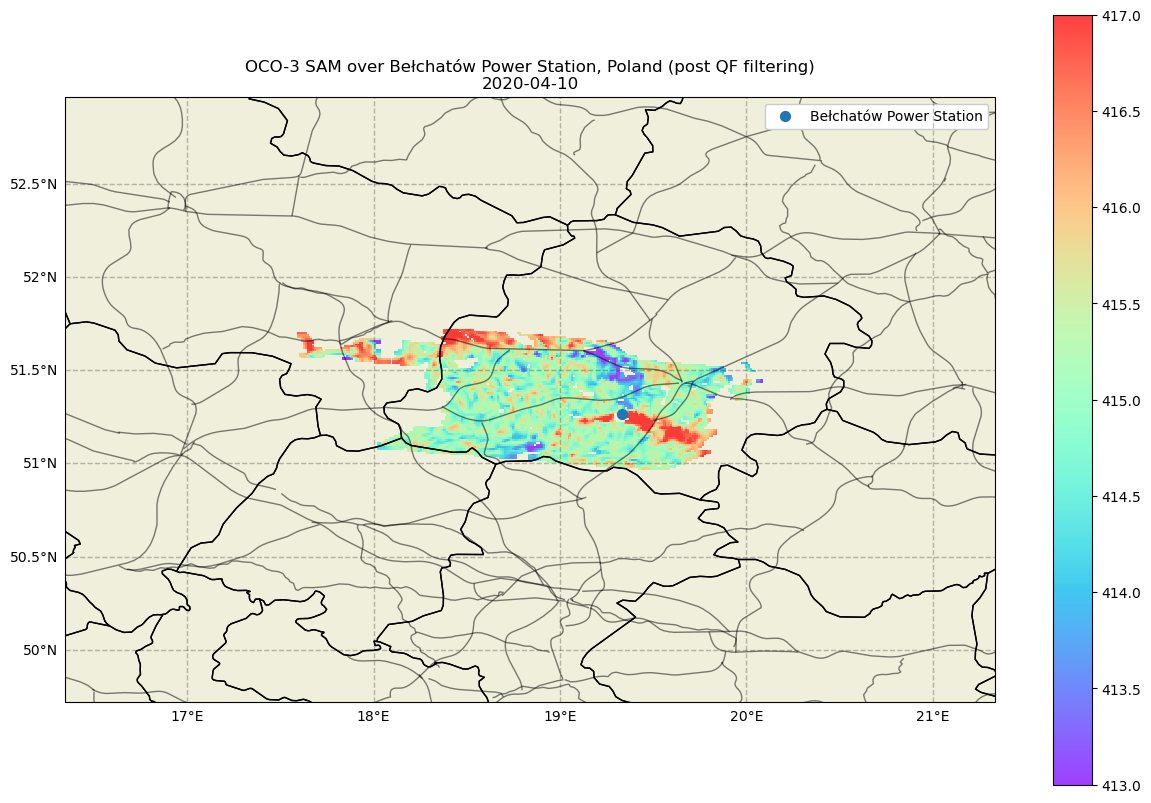

In [14]:
plotting.map_data(
    ppt_sams[0][0], 
    f'OCO-3 SAM over Bełchatów Power Station, Poland (post QF filtering)\n{datetime(2020, 4, 10).strftime("%Y-%m-%d")}',
    points=[(51.266, 19.331, 'Bełchatów Power Station')],
    padding=1.25,
    vmin=413, vmax=417
)

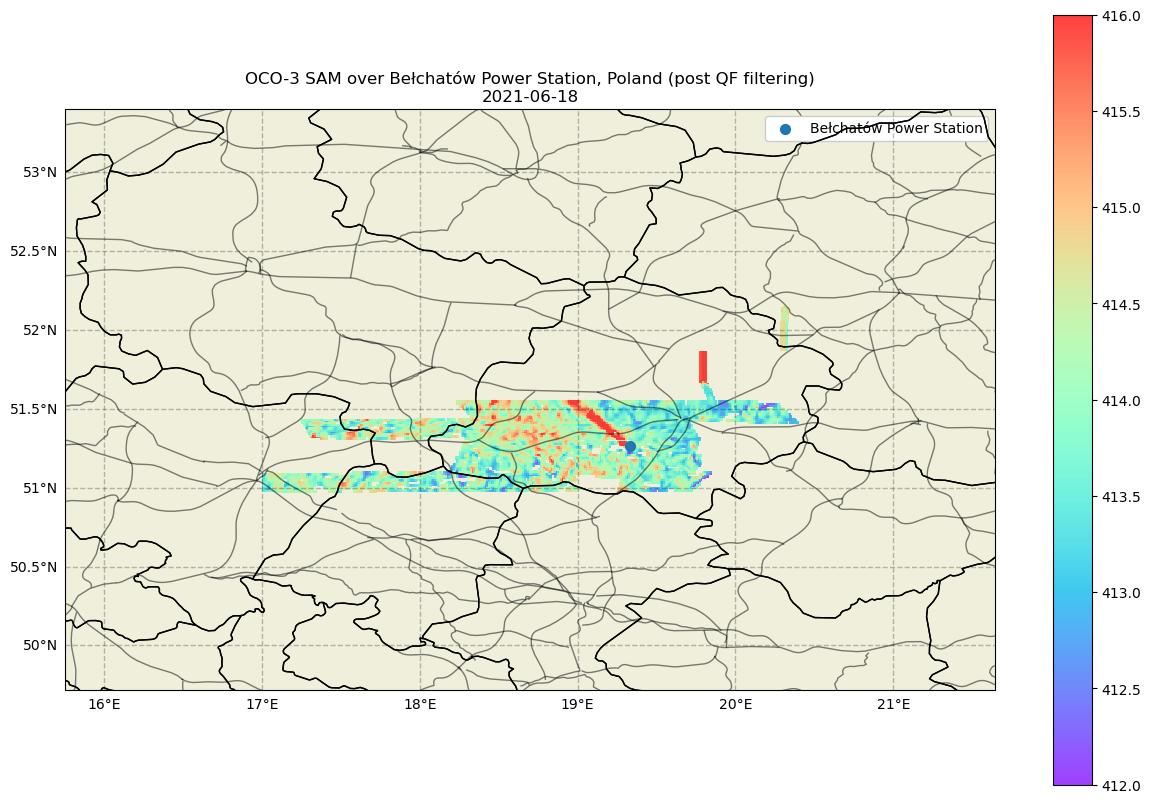

In [15]:
plotting.map_data(
    ppt_sams[1][0], 
    f'OCO-3 SAM over Bełchatów Power Station, Poland (post QF filtering)\n{datetime(2021, 6, 18).strftime("%Y-%m-%d")}',
    points=[(51.266, 19.331, 'Bełchatów Power Station')],
    padding=1.25,
    vmin=412, vmax=416
)

### Timeseries

The paper produces a timeseries of computed emissions from the power plant compared to its expected output. While we are unable to translate a similar timeseries from atmospheric concentration in parts per million to the paper's computed kilotons of CO2 per day (the techniques for doing so would be too complicated for the purposes this notebook), we can demonstrate a similar shape of the timeseries plot.

<div align="center">
    <figure>
        <img src="https://www.frontiersin.org/files/Articles/1028240/frsen-03-1028240-HTML-r1/image_m/frsen-03-1028240-g009.jpg" width=500 />
        <figcaption>Emissions timeseries from Nassar, et al.</figcaption>
    </figure>
</div>

In [16]:
ppt_timeseries = processing.spatial_timeseries(NEXUS_URL, 'oco3_sams_l3_post_qf', poland_ppt_bb, oco_start, oco_end)

https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeSeriesSpark?ds=oco3_sams_l3_post_qf&minLon=17&minLat=49&maxLon=21&maxLat=53&startTime=2020-04-10T00:00:00Z&endTime=2022-06-27T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 11.078380333000496 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


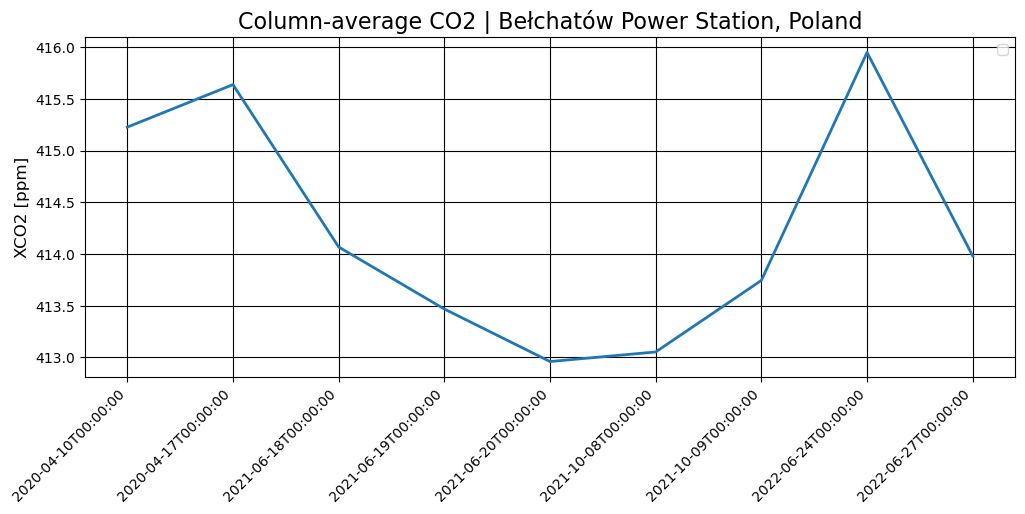

In [17]:
plotting.timeseries_plot_irregular(
    [
        #(ppt_timeseries['minimum'], None),
        (ppt_timeseries['mean'], '_hidden'),
        #(ppt_timeseries['maximum'], ''),
    ], 
    '', 
    'XCO2 [ppm]', 
    'Column-average CO2 | Bełchatów Power Station, Poland',
    times=[
        datetime(2020, 4, 10),
        datetime(2020, 4, 17),
        datetime(2021, 6, 18),
        datetime(2021, 6, 19),
        datetime(2021, 6, 20),
        datetime(2021, 10, 8),
        datetime(2021, 10, 9),
        datetime(2022, 6, 24),
        datetime(2022, 6, 27),
    ]
)

For the sake of completeness, we also include a timeseries over Bełchatów over the timeframe of our previous section.

In [18]:
oco_start = datetime(2018, 9, 14)
oco_end = datetime(2023, 7, 1)

ppt_timeseries = processing.spatial_timeseries(NEXUS_URL, 'oco3_sams_l3_post_qf', poland_ppt_bb, oco_start, oco_end)

https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeSeriesSpark?ds=oco3_sams_l3_post_qf&minLon=17&minLat=49&maxLon=21&maxLat=53&startTime=2018-09-14T00:00:00Z&endTime=2023-07-01T00:00:00Z&lowPassFilter=False

Waiting for response from SDAP...took 16.114147624999532 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


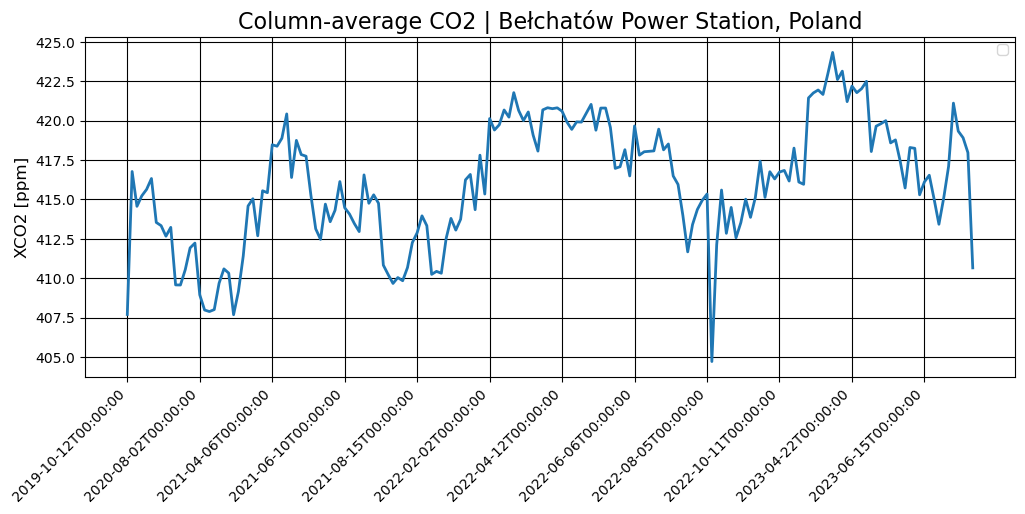

In [19]:
plotting.timeseries_plot_irregular(
    [
        #(ppt_timeseries['minimum'], None),
        (ppt_timeseries['mean'], '_hidden'),
        #(ppt_timeseries['maximum'], ''),
    ], 
    '', 
    'XCO2 [ppm]', 
    'Column-average CO2 | Bełchatów Power Station, Poland',
)

[1] Nassar R, Moeini O, Mastrogiacomo J-P, O’Dell CW, Nelson RR, Kiel M, Chatterjee A, Eldering A and Crisp D (2022), Tracking CO2 emission reductions from space: A case study at Europe’s largest fossil fuel power plant. Front. Remote Sens. 3:1028240.
doi: 10.3389/frsen.2022.1028240